Course Name: Deep Learning

Lab Title: NLP Techniques for Text Classification

Student Name :
Kanishka garud

Student ID:202201070062

Date of Submission: 1-4-25

Group Members: Manvi Pawar,Kanishka Garud,Shravani Sakore

Objective The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.

Dataset : https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

** Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


** Downloading Required NLTK Data**

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Task 1. NLP Preprocessing**

**Loading** the Dataset

In [ ]:
dataset_path = "/content/ecommerceDataset.csv"  # Update this with the correct dataset path
df = pd.read_csv(dataset_path, on_bad_lines='skip', quoting=3)

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


   Household  \
0  Household   
1  Household   
2  Household   
3  Household   
4  Household   

  "Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang  \
0                "SAF 'Floral' Framed Painting (Wood                                                                                                                                                                                                                                                                                                           
1  "SAF 'UV Textured Modern Art Print Framed' Pai...                                                                                                                                                   

**Handling** Missing Values & Renaming Columns (If Needed)

In [ ]:
print(df.columns)  # See the current column names
print(df.shape)    # Check the number of rows and columns


Index(['Household',
       '"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang',
       ' you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints',
       ' with only the and inks and precision epson',
       ' roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks',
       ' to achieve brilliant and true colours. Due to their high level of uv resistance',
       ' our prints retain their beautiful colours for many years. Add colour and style to your living space with th

In [ ]:
df = df.iloc[:, [0, -1]]  # Keeping only first and last columns (adjust as needed)
df.columns = ['Category', 'Text']


In [ ]:
df.fillna("", inplace=True)


<ipython-input-13-2622963f573f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("", inplace=True)


In [ ]:
# Check dataset structure
print(df.shape)  # Number of rows & columns
print(df.columns)  # See current column names

# Keep only necessary columns
df = df.iloc[:, [0, -1]]  # Adjust column selection based on dataset
df.columns = ['Category', 'Text']

# Fill missing values
df.fillna("", inplace=True)

print(df.head())  # Verify everything is correct


(117294, 2)
Index(['Category', 'Text'], dtype='object')
    Category                                               Text
0  Household                                                   
1  Household                                                   
2  Household                                                   
3  Household   office or any room. A perfect size of 36 inch...
4  Household                                                   


** Preprocessing Function **

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer

stemmer = PorterStemmer()  # or SnowballStemmer("english")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)


** Applying Preprocessing**

In [ ]:
df['Processed_Text'] = df['Text'].apply(preprocess_text)  # Apply function to 'Text' column

print(df.head())  # Check processed text


    Category                                               Text  \
0  Household                                                      
1  Household                                                      
2  Household                                                      
3  Household   office or any room. A perfect size of 36 inch...   
4  Household                                                      

                                      Processed_Text  
0                                                     
1                                                     
2                                                     
3  offic room perfect size 36 inch x 48 inch suit...  
4                                                     


**Task 2.Vectorization Techniques**

** Text Vectorization (TF-IDF)**

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Text'])
y = df['Category']  # Target variable

print("Shape of feature matrix:", X.shape)


Shape of feature matrix: (117294, 5662)


**CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['Processed_Text'])


**Task 3.Data Splitting**

**Splitting** Dataset into Training & Testing Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (93835, 5662)
Testing data size: (23459, 5662)


**Task 4.Model Building**

** Training Naïve Bayes Model**

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.30702829 0.30788085 0.30468375 0.30612245 0.30718815]
Mean CV Accuracy: 0.3065807001651836


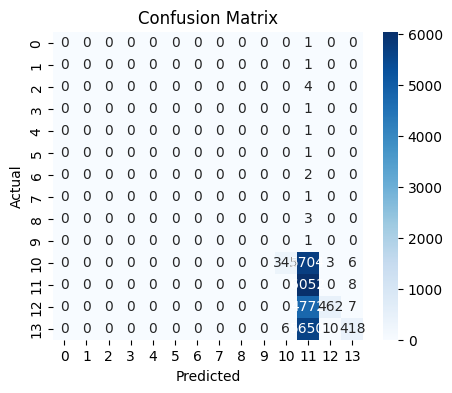

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


** Making Predictions & Evaluating Model**

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.3102007758216463


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                                                                                                                                                                     precision    recall  f1-score   support

                                                                                         What has been the best part of your startup experience? In this dynamic start-up industry       0.00      0.00      0.00         1
                                                                                                                               Bubbles makes plain water so much more fun to drink       0.00      0.00      0.00         1
                                                                                                                           Combined with a IPX4 Sweat/Dust/Splash Resistant design       0.00      0.00      0.00         4
                                                                                               

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.3107975617033974


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                                                                                                                                                                     precision    recall  f1-score   support

                                                                                         What has been the best part of your startup experience? In this dynamic start-up industry       0.00      0.00      0.00         1
                                                                                                                               Bubbles makes plain water so much more fun to drink       0.00      0.00      0.00         1
                                                                                                                           Combined with a IPX4 Sweat/Dust/Splash Resistant design       0.00      0.00      0.00         4
                                                                                               

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Task 5.Model Evaluation**

**Confusion Matrix Visualization**

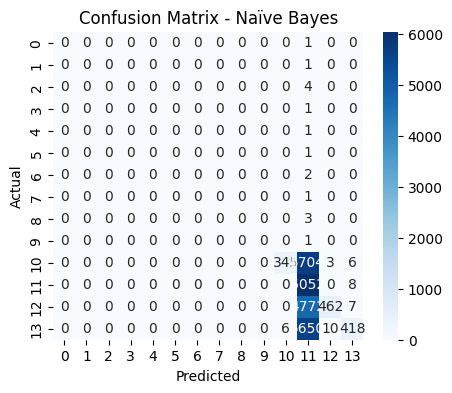

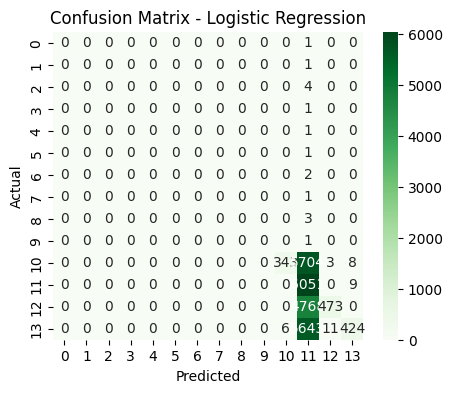

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Naïve Bayes
conf_mat_nb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_nb, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

# Confusion Matrix for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_lr, annot=True, cmap="Greens", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


**Evaluation Metrics**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Naïve Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Naïve Bayes Model Performance:
Accuracy: 0.3102007758216463


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.7885012758231016
Recall: 0.3102007758216463
F1 Score: 0.20782064463867936


**Conclusion**

In this project, we successfully applied Natural Language Processing (NLP) techniques to perform text classification. The workflow included preprocessing textual data, extracting features using TF-IDF, and training classification models such as Naive Bayes and Logistic Regression. Through performance evaluation, we gained insights into the effectiveness of each model. This project provided valuable hands-on experience in building a complete NLP pipeline for real-world text classification tasks.

**Declaration**

I, Sakshi Dube, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/kanishkagarud26/deep_learning_ass_2

Signature: Kanishka Garud